## Pair Programming Correlación y covarianza





En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.



In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
import random 

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,8) # para establecer el tamaño de todas las figuras del jupyter al mismo tamaño. 



1. Pregunta teórica: ¿Qué diferencia existe entre la covarianza y la correlación?



La covarianza nos indica si hay algún tipo de relación entre variables, sin especificar en qué grado. 
Puede ser negativa (si una aumenta la otra disminuye) o positiva (cuando una aumenta la otra también)

La correlación, en cambio, muestra la fuerza y la dirección de dicha relación entre dos variables. Puede ser de 0 (no hay) 1 (cuando aumenta una aumenta la otra) y -1 (cuando disminuye una aumenta la otra). Por lo tanto, nos da información sobre la relación de las variables. 


2. Calculad la covarianza y la correlación de nuestro dataset. No nos vale solo con que la calculéis, debéis hacer una interpretación de los resultados obtenidos. Calculad solo la correlación de Pearson.



### Covarianza

In [3]:
df = pd.read_csv("../datos/sephora_website_dataset.csv")
df.head()

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,...,True,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0


Guardamos las columnas numéricas en una variable usando el método select_dtypes

In [4]:
v_numericas = df.select_dtypes(include= ['int64', 'float64'] )

In [7]:
v_numericas

,id,rating,number_of_reviews,love,price,value_price,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,4.0,4,3002,66.0,75.0,1,0,0,0
1,2044816,4.5,76,2700,66.0,66.0,1,0,0,0
2,1417567,4.5,26,2600,180.0,180.0,1,0,0,0
3,1417617,4.5,23,2900,120.0,120.0,1,0,0,0
4,2218766,3.5,2,943,72.0,80.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9163,2208502,2.0,15,6200,6.0,6.0,0,1,1,0
9164,2298909,0.0,0,266,15.0,27.0,0,1,0,0
9165,2236750,0.0,0,445,16.0,16.0,0,1,0,0
9166,50,5.0,46,0,50.0,50.0,0,0,0,0


Pero vemos que algunas son, en realidad, categóricas. Creamos manualmente un dataframe con las realmente numéricas (también podríamos haber usado el método .drop)

In [5]:
df_numericas = v_numericas[['rating', 'number_of_reviews', 'love', 'price', 'value_price']]

Con el método .cov() calcumos la covarianza 

In [6]:
df_numericas.cov()

,rating,number_of_reviews,love,price,value_price
rating,1.015473,7.312668e+01,4.069726e+03,0.929626,0.096721
number_of_reviews,73.126676,7.932432e+05,2.831233e+07,-3528.645833,-3914.087396
love,4069.726086,2.831233e+07,1.815315e+09,-178294.360424,-192057.130306
price,0.929626,-3.528646e+03,-1.782944e+05,2224.536195,2293.909773
value_price,0.096721,-3.914087e+03,-1.920571e+05,2293.909773,2446.194685


Por ejemplo, veamos la relación entre rating y love. Es de 4069.726086, positiva, aumentarán a la par. 
En cambio, entre love y price tenemos -1.782944e+05, un valor negativo, con lo que cuando una aumente la otra disminuirá.

Para mostrar la covarianza de manera visual usaremos un pairplot. También podremos observar la correlación.

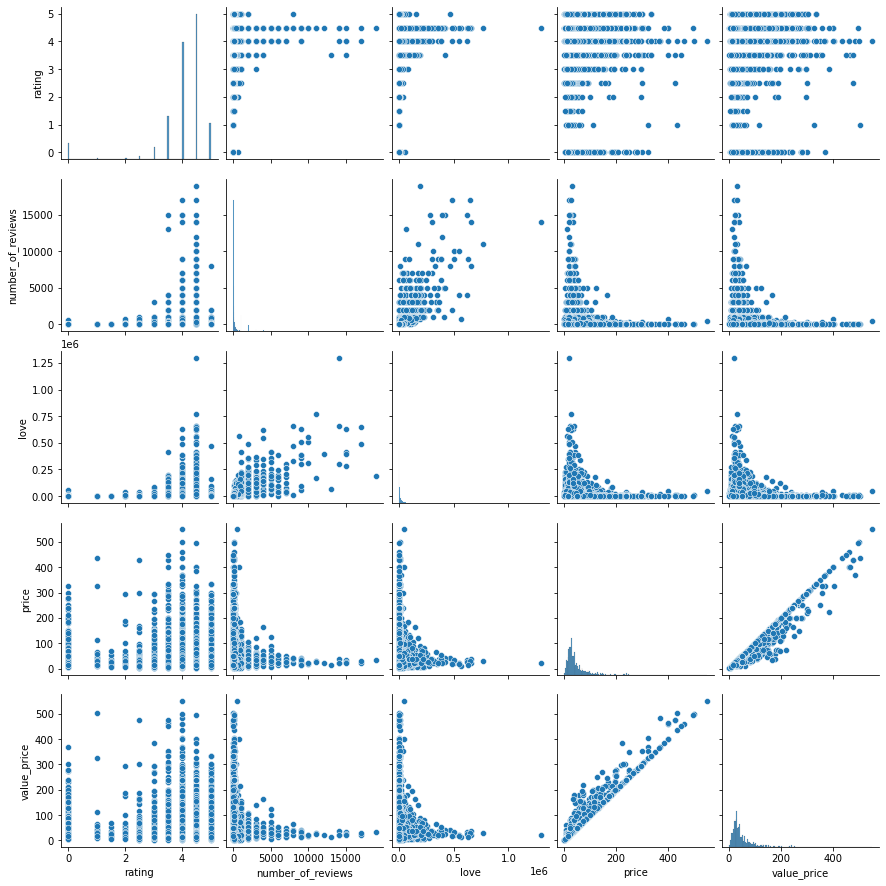

In [9]:
sns.pairplot(df_numericas);

El pairplot nos crea dos gráficas: 
- En la diagonal podemos ver los histogramas. 
- Las demás son scatterplots mostrando la relación entre variables.

Las variables más claramente relacionadas son price y value price. En cambio, love y number of reviews están mucho más dispersas que las demás. 

### Correlación de Pearson

In [8]:
df_numericas.corr(method = 'pearson')

,rating,number_of_reviews,love,price,value_price
rating,1.000000,0.081478,0.094788,0.019559,0.001941
number_of_reviews,0.081478,1.000000,0.746099,-0.084001,-0.088855
love,0.094788,0.746099,1.000000,-0.088724,-0.091140
price,0.019559,-0.084001,-0.088724,1.000000,0.983357
value_price,0.001941,-0.088855,-0.091140,0.983357,1.000000


Si nos fijamos en las variables rating y love vemos que el coeficiente Pearson es de 0.094788, es decir, positiva pero muy débil. 

La correlación más alta y positiva es la de price y value price, con un coeficiente de 0.983357. También love y number of reviews, 0.746099. Al ser de casi 0.75 la podemos considerar *muy alta*. 


3. Con los resultados de la correlación del ejercicio anterior, cread un heatmap.


Hacemos el heatmap con el método .corr() para visualizar la correlación

In [9]:
mask = np.triu(np.ones_like(df_numericas.corr(), dtype=np.bool_))
mask

array([[ True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [False, False,  True,  True,  True],
       [False, False, False,  True,  True],
       [False, False, False, False,  True]])

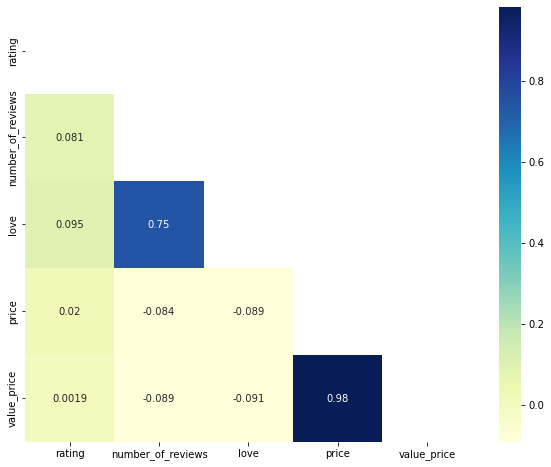

In [10]:
sns.heatmap(df_numericas.corr(), 
           cmap = "YlGnBu", 
           mask = mask,
           annot = True);

4. Guardad la gráfica del heatmap